In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
from helper import laplace_solution, plot_3d

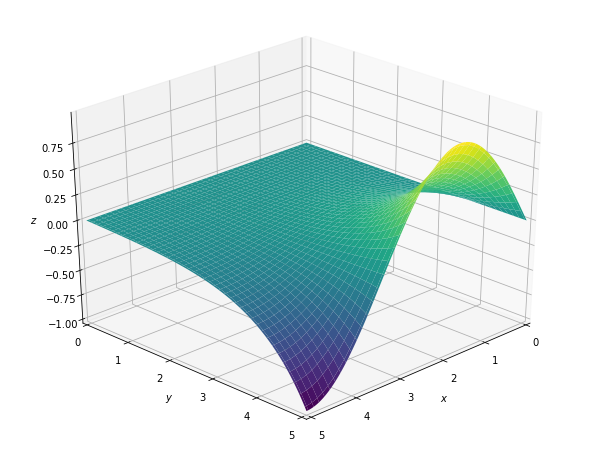

In [3]:
nx, ny = 128, 128
Lx, Ly = 5.0, 5.0
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)

x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

p_exact = laplace_solution(x, y, Lx, Ly)
plot_3d(x, y, p_exact)

In [4]:
def laplace2d_jacobi(p0, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    ite = 0
    rdiff = rtol + 1.0
    conv = []
    while rdiff > rtol and ite < maxiter:
        pn = p.copy()
        p[1:-1, 1:-1] = 0.25 * (p[:-2, 1:-1] + p[1:-1, :-2] + p[1:-1, 2:] + p[2:, 1:-1])
        p[1:-1, -1] = 0.25 * (pn[:-2, -1] + 2 * pn[1:-1, -2] + pn[2:, -1])
        rdiff = numpy.sqrt(numpy.sum((p - pn)**2) / numpy.sum(pn**2))
        conv.append(rdiff)
        ite += 1
    return p, ite, conv

In [5]:
p0 = numpy.zeros((ny,nx))
p0[-1, :] = numpy.sin(1.5 * numpy.pi * x / Lx)

In [6]:
%%time
p, ites, conv = laplace2d_jacobi(p0, rtol=1e-8)
print(ites, conv[-1])

20000 1.455843138324046e-08
CPU times: user 4.22 s, sys: 0 ns, total: 4.22 s
Wall time: 4.21 s


In [23]:
def laplace2d_jacobi_2(p0, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    ite = 0
    rdiff = rtol + 1.0
    conv = []
    while rdiff > rtol and ite < maxiter:
        pn = p.copy()
        for j in range(1, ny - 1):
            for i in range(1, nx - 1):
                p[j, i] = 0.25 * (p[j-1, i] + p[j, i - 1] + p[j, i +1] + p[j + 1, i])
        for j in range(1, ny - 1):
            p[j, -1] = 0.25 * (pn[j - 1, -1] + 2 * pn[j, -2] + pn[j + 1, -1])
        rdiff = numpy.sqrt(numpy.sum((p - pn)**2) / numpy.sum(pn**2))
        conv.append(rdiff)
        ite += 1
    return p, ite, conv

In [8]:
%%time
p, ites, conv = laplace2d_jacobi(p0, maxiter=500)
print(ites, conv[-1])

500 0.0006559896691815179
CPU times: user 104 ms, sys: 0 ns, total: 104 ms
Wall time: 173 ms


In [11]:
%%time
p, ites, conv = laplace2d_jacobi_2(p0, maxiter=500)
print(ites, conv[-1])

500 0.0005920237170650388
CPU times: user 8.3 s, sys: 32 ms, total: 8.34 s
Wall time: 8.36 s


In [24]:
def laplace2d_jacobi_gauss_seidel(p0, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    ite = 0
    rdiff = rtol + 1.0
    conv = []
    while rdiff > rtol and ite < maxiter:
        pn = p.copy()
        for j in range(1, ny - 1):
            for i in range(1, nx - 1):
                p[j, i] = 0.25 * (p[j-1, i] + p[j, i - 1] + pn[j, i +1] + pn[j + 1, i])
        for j in range(1, ny - 1):
            p[j, -1] = 0.25 * (p[j - 1, -1] + 2 * p[j, -2] + p[j + 1, -1])
        rdiff = numpy.sqrt(numpy.sum((p - pn)**2) / numpy.sum(pn**2))
        conv.append(rdiff)
        ite += 1
    return p, ite, conv

In [13]:
%%time
p, ites, conv = laplace2d_jacobi_gauss_seidel(p0, maxiter=500)
print(ites, conv[-1])

500 0.0005920237170650388
CPU times: user 8.22 s, sys: 4 ms, total: 8.22 s
Wall time: 8.22 s


In [14]:
import numba

In [15]:
from numba import jit

In [16]:
def fib(n):
    a, b = 1, 1
    for i in range(n-2):
        a, b = b, a + b
    return b

In [17]:
fib(3)

2

In [18]:
%%timeit
fib(500000)

4.52 s ± 698 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
@jit
def fib(n):
    a, b = 1, 1
    for i in range(n-2):
        a, b = b, a + b
    return b

In [20]:
%%timeit
fib(500000)

348 µs ± 28 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
@jit
def laplace2d_jacobi_gauss_seidel_jit(p0, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    ite = 0
    rdiff = rtol + 1.0
    conv = []
    while rdiff > rtol and ite < maxiter:
        pn = p.copy()
        for j in range(1, ny - 1):
            for i in range(1, nx - 1):
                p[j, i] = 0.25 * (p[j-1, i] + p[j, i - 1] + pn[j, i +1] + pn[j + 1, i])
        for j in range(1, ny - 1):
            p[j, -1] = 0.25 * (p[j - 1, -1] + 2 * p[j, -2] + p[j + 1, -1])
        rdiff = numpy.sqrt(numpy.sum((p - pn)**2) / numpy.sum(pn**2))
        conv.append(rdiff)
        ite += 1
    return p, ite, conv

In [33]:
%%time
p, ites, conv = laplace2d_jacobi_gauss_seidel_jit(p0, rtol=1e-8)
print(ites, conv[-1])

13939 9.997635652645034e-09
CPU times: user 2.75 s, sys: 0 ns, total: 2.75 s
Wall time: 2.74 s


In [27]:
@jit
def laplace2d_jacobi_2(p0, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    ite = 0
    rdiff = rtol + 1.0
    conv = []
    while rdiff > rtol and ite < maxiter:
        pn = p.copy()
        for j in range(1, ny - 1):
            for i in range(1, nx - 1):
                p[j, i] = 0.25 * (p[j-1, i] + p[j, i - 1] + p[j, i +1] + p[j + 1, i])
        for j in range(1, ny - 1):
            p[j, -1] = 0.25 * (pn[j - 1, -1] + 2 * pn[j, -2] + pn[j + 1, -1])
        rdiff = numpy.sqrt(numpy.sum((p - pn)**2) / numpy.sum(pn**2))
        conv.append(rdiff)
        ite += 1
    return p, ite, conv

In [28]:
%%time
p, ites, conv = laplace2d_jacobi_gauss_seidel(p0, maxiter=500)
print(ites, conv[-1])

500 0.0005920237170650394
CPU times: user 84 ms, sys: 0 ns, total: 84 ms
Wall time: 80.2 ms


In [29]:
@jit
def laplace2d_jacobi(p0, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    ite = 0
    rdiff = rtol + 1.0
    conv = []
    while rdiff > rtol and ite < maxiter:
        pn = p.copy()
        p[1:-1, 1:-1] = 0.25 * (p[:-2, 1:-1] + p[1:-1, :-2] + p[1:-1, 2:] + p[2:, 1:-1])
        p[1:-1, -1] = 0.25 * (pn[:-2, -1] + 2 * pn[1:-1, -2] + pn[2:, -1])
        rdiff = numpy.sqrt(numpy.sum((p - pn)**2) / numpy.sum(pn**2))
        conv.append(rdiff)
        ite += 1
    return p, ite, conv

In [30]:
%%time
p, ites, conv = laplace2d_jacobi(p0, rtol=1e-8)
print(ites, conv[-1])

19993 9.998616841297063e-09
CPU times: user 3.97 s, sys: 12 ms, total: 3.98 s
Wall time: 3.97 s


In [40]:
@jit
def laplace2d_sor_jit(p0, omega, maxiter=20000, rtol=1e-6):
    ny, nx = p0.shape
    p = p0.copy()
    conv = []  # convergence history
    diff = rtol + 1.0  # initial difference
    ite = 0  # iteration index
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        # Update the solution at interior points.
        for j in range(1, ny - 1):
            for i in range(1, nx - 1):
                p[j, i] = ((1.0 - omega) * p[j, i] +
                           omega * 0.25 *(p[j, i - 1] + p[j, i + 1] +
                                          p[j - 1, i] + p[j + 1, i]))
        # Apply 2nd-order Neumann condition (zero-gradient)
        # at the right boundary.
        for j in range(1, ny - 1):
            p[j, -1] = 0.25 * (2.0 * p[j, -2] +
                               p[j - 1, -1] + p[j + 1, -1])
        # Compute the relative L2-norm of the difference.
        diff = numpy.sqrt(numpy.sum((p - pn)**2) / numpy.sum(pn**2))
        conv.append(diff)
        ite += 1
    return p, ite, conv

In [41]:
p, ites, conv = laplace2d_sor_jit(p0, 1.5, rtol=1e-08)
print(ites, conv[-1])

7108 9.991011447055284e-09


In [43]:
omega = 2 / (1 + numpy.pi / nx)
p, ites, conv = laplace2d_sor_jit(p0, omega, rtol=1e-08)
print(ites, conv[-1])

1110 9.964283907855956e-09


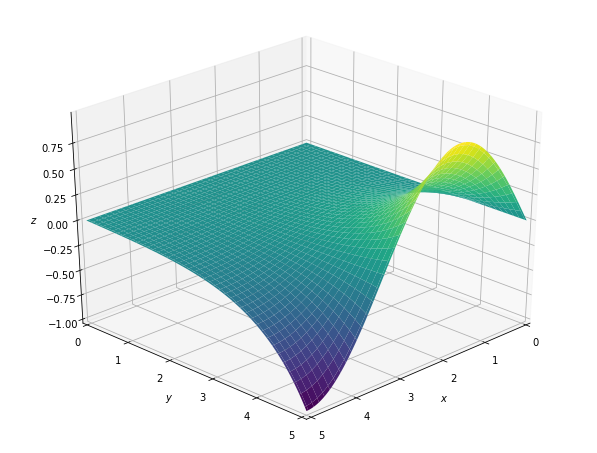

In [44]:
plot_3d(x, y, p)